In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("C:/Users/prash/Downloads/abc/youtubers_df.csv")

# Data Exploration

In [164]:
df.shape        

(694, 9)

In [166]:
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [33]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

In [40]:
df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


#  Data Cleaning

In [41]:
df.isnull().sum()          # calculate null values

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [46]:
df.dropna(inplace = True)          # drop null values from original data set using inplace=true

In [47]:
df.shape                # again check dataset

(694, 9)

# Data Analysis

In [56]:
#  1. most popular category among you tube streamer

popular_category = df["Categories"].value_counts()
print(popular_category)

Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Educación                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Películas, Videojuegos                  8
Deportes                                8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

In [60]:
top_5_category= popular_category.head(5)
print (top_5_category)

Música y baile               160
Películas, Animación          61
Música y baile, Películas     41
Vlogs diarios                 37
Noticias y Política           36
Name: Categories, dtype: int64


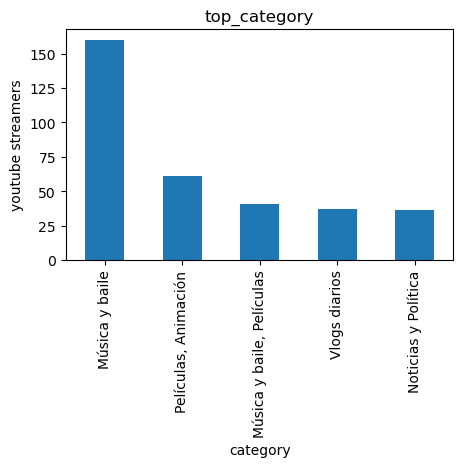

In [93]:
plt.figure(figsize=(5,3))
top_5_category.plot(kind='bar')
plt.title('top_category')
plt.xlabel('category')
plt.ylabel('youtube streamers')
plt.show()

# Top 5 category with youtube streamer.

In [63]:
# 1a. Is there a correlation between the number of subscribers and the number of likes or comments?

correlation_likes = df['Suscribers'].corr(df['Likes'])
correlation_comments = df['Suscribers'].corr(df['Comments'])


print(correlation_likes)
print(correlation_comments)

0.24838887155409808
0.03729270392381571


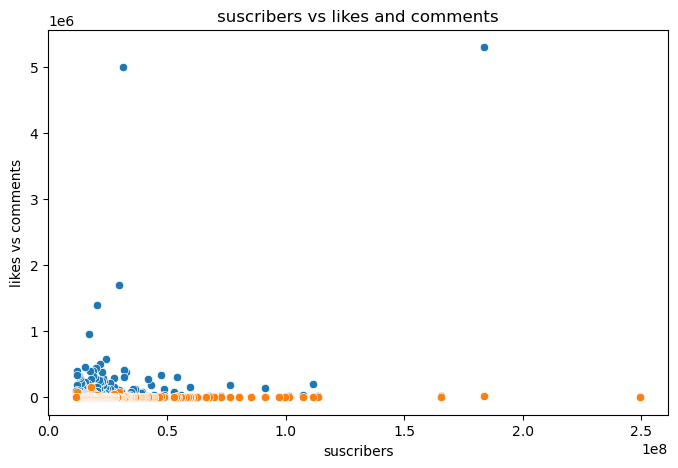

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Suscribers', y = 'Likes', data = df )
sns.scatterplot(x = 'Suscribers',y = 'Comments',data= df)
plt.title('suscribers vs likes and comments')
plt.xlabel('suscribers')
plt.ylabel('likes vs comments' )
plt.show()

# Above scatter plot shows that there is weak positive correlation between suscribers ,likes and comments .

In [79]:
# 2. top countries 
top_countries = df['Country'].value_counts().head(5)
print(top_countries)

Estados Unidos    226
Unknown           136
India             112
Brasil             51
México             42
Name: Country, dtype: int64


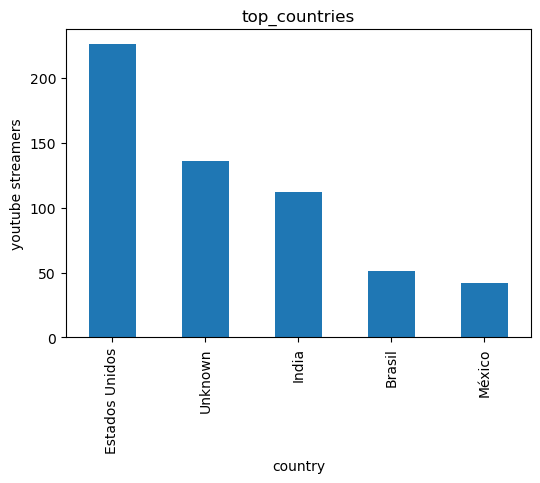

In [86]:
plt.figure(figsize=(6,4))
top_countries.plot(kind= 'bar')
plt.title('top_countries')
plt.xlabel('country')
plt.ylabel('youtube streamers')
plt.show()

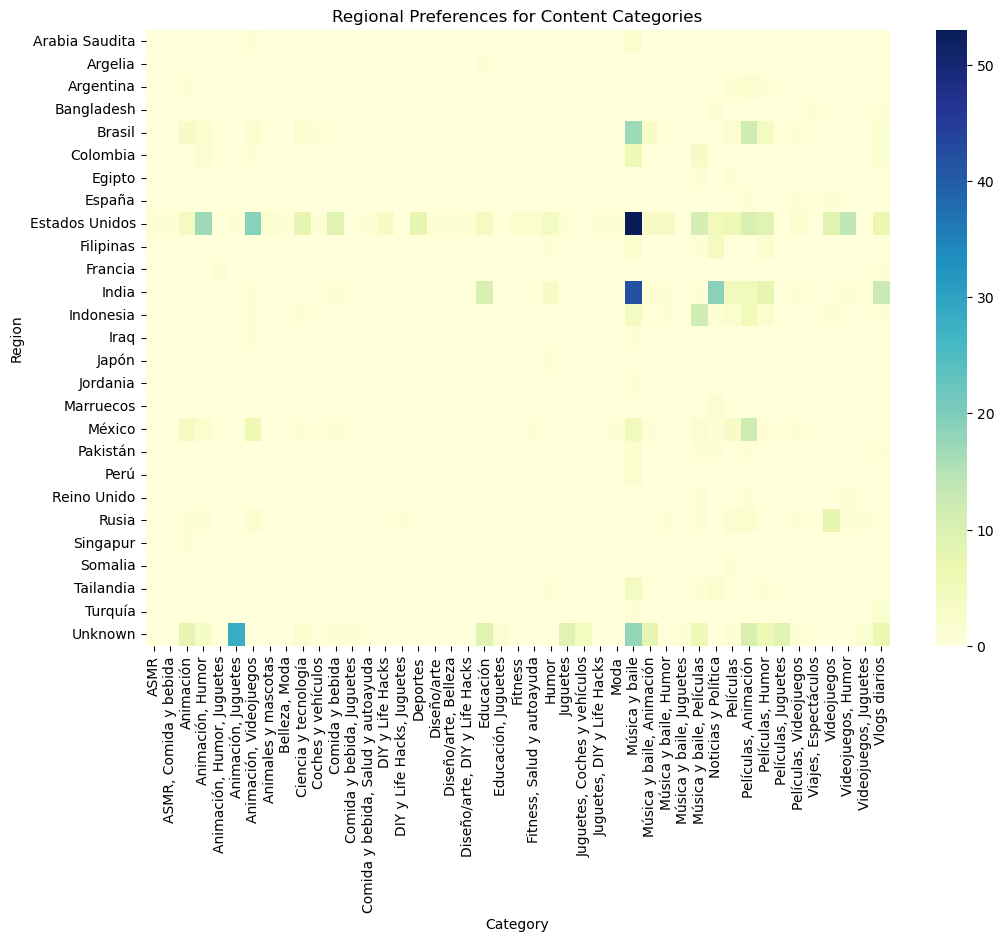

In [99]:
# 3a  distribution of streamers audiences by country. Are there regional preferences for specific content categories?

region_category_counts = df.pivot_table(index='Country', columns='Categories', aggfunc='size', fill_value=0)


plt.figure(figsize=(12, 8))
sns.heatmap(region_category_counts, cmap="YlGnBu")
plt.title('Regional Preferences for Content Categories')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()



# Above bar graph show top 5 country with highest streamers.

In [90]:
# 4a. average number of subscribers, visits, likes, and comments.


df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,694.000000,6.940000e+02,6.940000e+02,6.940000e+02,694.000000
mean,495.298271,2.241556e+07,1.210730e+06,5.347360e+04,1558.793948
std,289.222212,1.824123e+07,6.038274e+06,2.979711e+05,7967.470234
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,244.250000,1.380000e+07,3.692500e+04,5.685000e+02,2.000000
50%,492.500000,1.680000e+07,1.587000e+05,3.550000e+03,78.000000
75%,746.750000,2.390000e+07,8.339000e+05,2.377500e+04,499.750000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


In [104]:
# 4a. averge numbers of likes , suscribers ,comments and visits.
averge_suscriber = df['Suscribers'].mean()
averge_likes = df['Likes'].mean()
averge_Comments = df['Comments'].mean()
averge_visits = df['Visits'].mean()
print(averge_suscriber)
print(averge_likes)
print(averge_Comments)
print(averge_visits)


22415561.95965418
53473.59798270893
1558.793948126801
1210729.6829971182


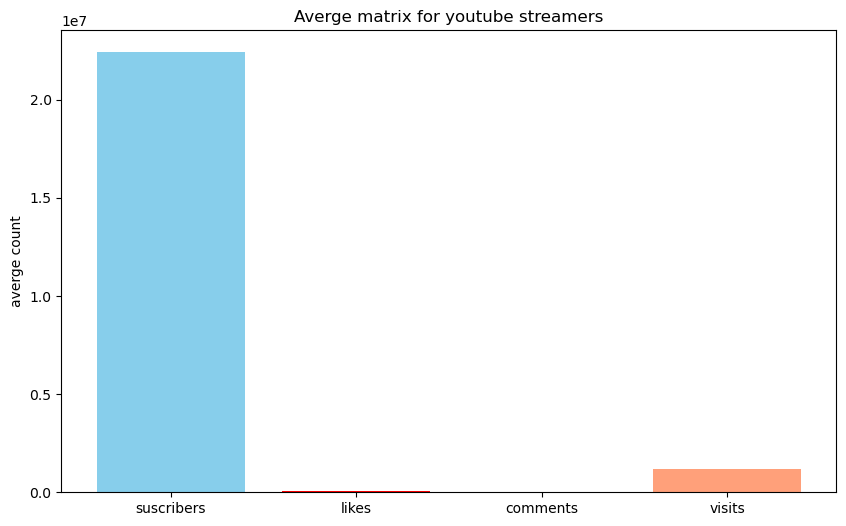

In [112]:
# plot barplot for visualisation of averge values.

labels = ['suscribers','likes','comments','visits']
values = [averge_suscriber,averge_likes,averge_Comments,averge_visits]

plt.figure(figsize=(10,6))
plt.bar( labels , values , color=['skyblue', 'red', 'blue', 'lightsalmon'])
plt.title('Averge matrix for youtube streamers')
plt.ylabel('averge count')
plt.show()

In [103]:
df.columns

Index(['Rank', 'Username', 'Categories', 'Suscribers', 'Country', 'Visits',
       'Likes', 'Comments', 'Links'],
      dtype='object')

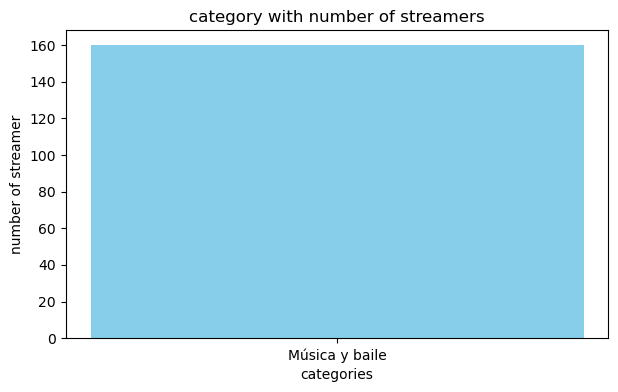

In [127]:
# 5 Which categories have the highest number of streamers?

category_streamer_count = df['Categories'].value_counts()
most_popular_category = category_streamer_count.idxmax()
number_of_streamers = category_streamer_count.max() 

plt.figure(figsize=(7,4))
plt.bar(most_popular_category,number_of_streamers, color= 'skyblue') 
plt.title('category with number of streamers')
plt.xlabel('categories')           
plt.ylabel('number of streamer')
plt.show()

In [129]:
df['Username']

0                   tseries
1                   MrBeast
2                 CoComelon
4             KidsDianaShow
5                 PewDiePie
               ...         
989                     cut
990               JoeHattab
991                BeAmazed
997    LittleAngelIndonesia
999           OneindiaHindi
Name: Username, Length: 694, dtype: object

In [130]:
# 6 Top 10 youtuber with heighest number of suscribers

Top_10_username= df.nlargest(10 , 'Suscribers')
print(Top_10_username)

    Rank            Username              Categories   Suscribers  \
0      1             tseries          Música y baile  249500000.0   
1      2             MrBeast      Videojuegos, Humor  183500000.0   
2      3           CoComelon               Educación  165500000.0   
4      5       KidsDianaShow     Animación, Juguetes  113500000.0   
5      6           PewDiePie  Películas, Videojuegos  111500000.0   
6      7  LikeNastyaofficial                Juguetes  107500000.0   
7      8         VladandNiki     Animación, Juguetes  101400000.0   
8      9     zeemusiccompany          Música y baile   99700000.0   
9     10                 WWE             Videojuegos   97200000.0   
10    11           BLACKPINK          Música y baile   91300000.0   

           Country       Visits      Likes  Comments  \
0            India      86200.0     2700.0      78.0   
1   Estados Unidos  117400000.0  5300000.0   18500.0   
2          Unknown    7000000.0    24700.0       0.0   
4          Unkno

In [138]:
top_10_suscribers = df.nlargest(10, 'Suscribers')
top_10_df = pd.DataFrame(top_10_suscribers[['Username', 'Suscribers']])
print(top_10_df)

              Username   Suscribers
0              tseries  249500000.0
1              MrBeast  183500000.0
2            CoComelon  165500000.0
4        KidsDianaShow  113500000.0
5            PewDiePie  111500000.0
6   LikeNastyaofficial  107500000.0
7          VladandNiki  101400000.0
8      zeemusiccompany   99700000.0
9                  WWE   97200000.0
10           BLACKPINK   91300000.0


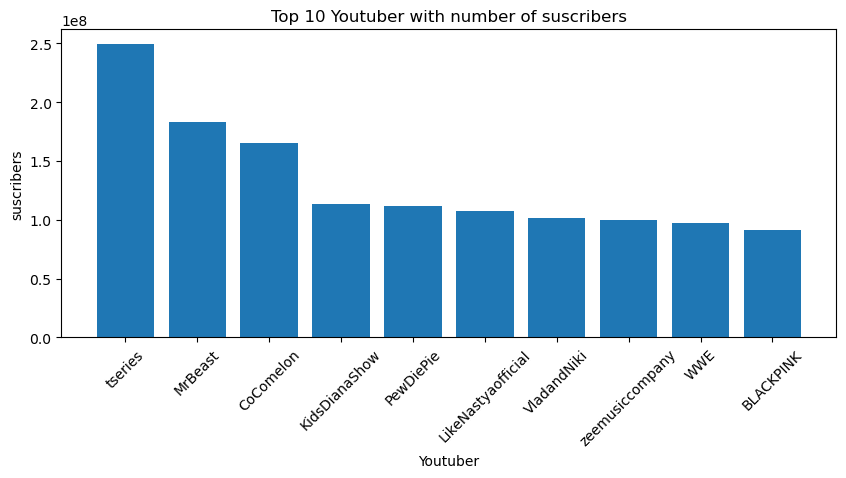

In [143]:
plt.figure(figsize=(10,4))

plt.bar(top_10_df['Username'],top_10_df['Suscribers'])
plt.title('Top 10 Youtuber with number of suscribers') 
plt.xlabel('Youtuber')
plt.ylabel('suscribers') 
plt.xticks(rotation=45)
plt.show()

In [148]:
# 6 b Top 10 youtuber with maximum numbers of likes

top_10_likes = df.nlargest(10,'Likes')
top_10_likes = pd.DataFrame(top_10_likes[['Username','Likes']])
print(top_10_likes)

                     Username      Likes
1                     MrBeast  5300000.0
136                  MrBeast2  5000000.0
153                 DaFuqBoom  1700000.0
341           triggeredinsaan  1400000.0
488         BeastPhilanthropy   952100.0
238                alanbecker   582600.0
306  khangsresearchcentre1685   501700.0
590                   GoAmiGo   455300.0
366                    Vsauce   449000.0
131              fedevigevani   412200.0


In [152]:
df['Likes']

0         2700.0
1      5300000.0
2        24700.0
4        12400.0
5       197300.0
         ...    
989       8800.0
990      98500.0
991       9900.0
997        745.0
999         31.0
Name: Likes, Length: 694, dtype: float64

In [157]:
df['Likes'] = df['Likes'].astype(int)

In [154]:
df['Likes']

0         2700
1      5300000
2        24700
4        12400
5       197300
        ...   
989       8800
990      98500
991       9900
997        745
999         31
Name: Likes, Length: 694, dtype: int32

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        694 non-null    int64  
 1   Username    694 non-null    object 
 2   Categories  694 non-null    object 
 3   Suscribers  694 non-null    float64
 4   Country     694 non-null    object 
 5   Visits      694 non-null    float64
 6   Likes       694 non-null    int32  
 7   Comments    694 non-null    float64
 8   Links       694 non-null    object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 51.5+ KB


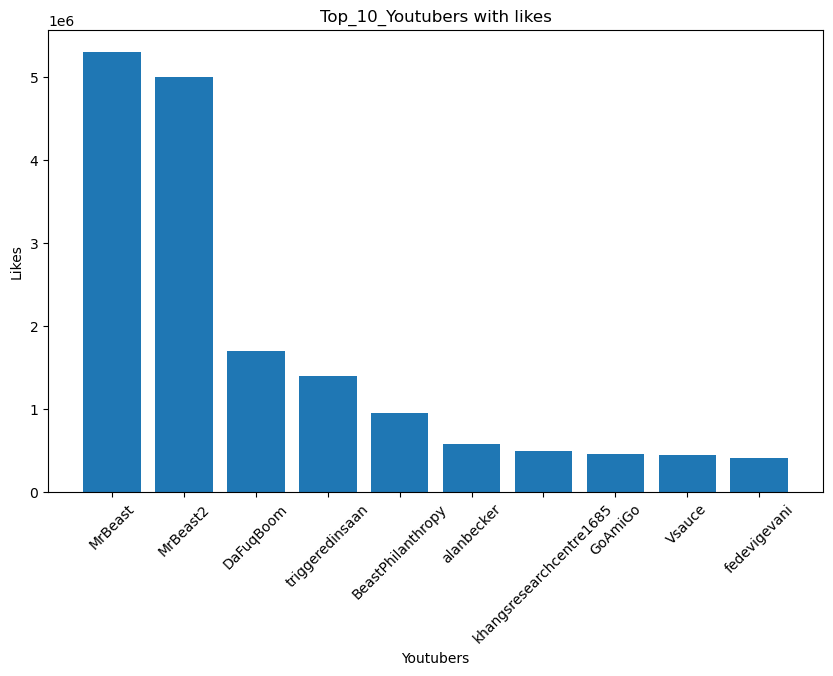

In [163]:
plt.figure(figsize=(10,6))
plt.bar(top_10_likes ['Username'],top_10_likes ['Likes'])
plt.title('Top_10_Youtubers with likes')
plt.xlabel('Youtubers')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

#  From the above two graphs we can conclude that T-series and Mrbeast are top youtubers with highest number of suscribers and likes . 